<h2>Chatbot practice</h2>

<h4>Exact match</h4>

In [2]:
# hard-coded exact questions
responses_exact = {
    'what would you like to eat tonight?': 'Pasta with salmon and red pesto please!',
    'what time will you be home tonight?': 'I will be home around 6 pm.',
    'default': 'I love you too!'
}

def respond_exact(text):
    response = responses_exact.get(text.lower(), responses_exact['default'])
    return print(f'IN: {text}\nOUT: {response}\n{"-"*10}')

In [3]:
respond_exact('What would you like to eat tonight?')
respond_exact('What time will you be home tonight?')
respond_exact('I want to train a good chatbot!')

IN: What would you like to eat tonight?
OUT: Pasta with salmon and red pesto please!
----------
IN: What time will you be home tonight?
OUT: I will be home around 6 pm.
----------
IN: I want to train a good chatbot!
OUT: I love you too!
----------


<h4>Pattern matching</h4>

In [4]:
import re
# define keywords that can help determine the intent
intent_keywords = {
    'dinner_preference': ['eat', 'dinner', 'food', 'cook', 'craving'],
    'arrival_time': ['time', 'when', 'get here', 'be home']
}

# create a dictionary of patterns
patterns = {key: re.compile('|'.join(intents)) for key, intents in intent_keywords.items()}

# define a function to find the intent of a message
def get_intent_re(message):
    for key, pattern in patterns.items():
        # check if the pattern occurs in the message
        if pattern.search(message):
            return key
    return 'default'

responses_re = {
    'dinner_preference': 'Pasta with salmon and red pesto please!',
    'arrival_time': 'I will be home around 6 pm.',
    'default': 'I love you too!'
}

def respond_re(text):
    response = responses_re.get(get_intent_re(text))
    return print(f'IN: {text}\nOUT: {response}\n{"-"*10}')

In [5]:
respond_re('What would you like to eat tonight?')
respond_re('What time will you be home tonight?')
respond_re('I want to be home to train a good chatbot!')

IN: What would you like to eat tonight?
OUT: Pasta with salmon and red pesto please!
----------
IN: What time will you be home tonight?
OUT: I will be home around 6 pm.
----------
IN: I want to be home to train a good chatbot!
OUT: I will be home around 6 pm.
----------


<h4>Machine learning</h4>

In [1]:
import re

import numpy as np
import pandas as pd

# read data
data_path = 'data/data.csv'
df = pd.read_csv(data_path)

# visualize  data
print (f"Let's explore our question set:\n{df['question']}")
print (f"Length of training set, {len(df['question'])}")
print (f"Unique answers are {set(df['answer'])} and number of unique answers are {len(set(df['answer']))}")

Let's explore our question set:
0                        how are you doing today ?
1                                how is your day ?
2                                         good day
3                                     good morning
4     Hope you have a lovely and beautiful morning
5                What a beautiful and pleasant day
6                          Have a pleasant morning
7                            what a lovely morning
8                          how is it going today ?
9                                  have a nice day
10                                   see you later
11                                      good night
12                                         bye bye
13                               talk to you later
14                          see you sometime later
15                                 have a nice day
16                                talk to you soon
17                              make me a sandwich
18                      can you make a sandwitch ?

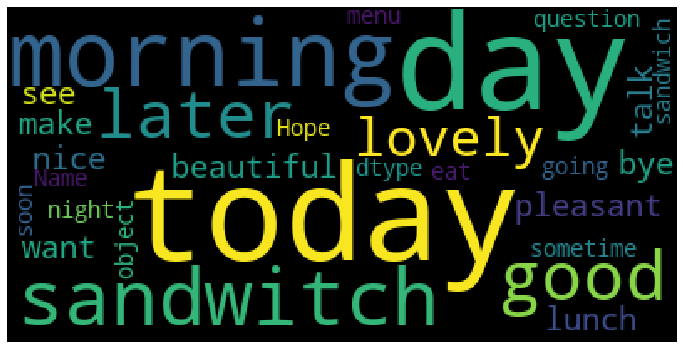

In [3]:
# creat world cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud(data, title=None):
    wc = WordCloud(background_color='black').generate(str(data))
    
    plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
show_wordcloud(df['question'])

Plot word frequencies using Counter function

[('a', 11), ('you', 7), ('today', 5), ('?', 5), ('day', 5)]


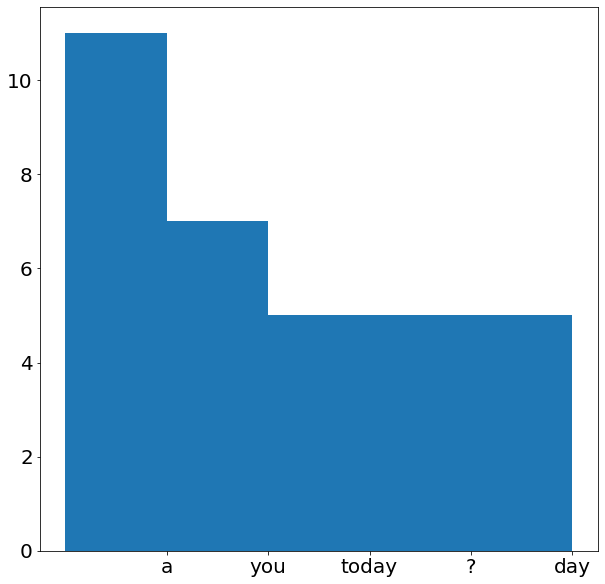

In [65]:
from collections import Counter

# get every word in corpus
word_list = [word for sentence in df['question'] for word in sentence.split()]
frequency = Counter(word_list)

print(frequency.most_common(5))

labels, values = zip(*frequency.items())
top_word = []
top_count = []
for i in frequency.most_common(5):
    top_word.append(i[0])
    top_count.append(i[1])

indexes = np.arange(len(top_word))
width = 1
plt.figure(figsize=(10, 10))
plt.bar(indexes, top_count, width)
plt.xticks(indexes+width*0.5, top_word, fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [66]:
# remove punctuations and change word to lower case
def remove_punctuations(text):
    words = [word.lower() for word in text.split()]
    words = [w for word in words for w in re.sub(r'[^\w\s]', '', word).split()]
    return words
df['question_punctuation_removed'] = df['question'].apply(remove_punctuations)
df['question_punctuation_removed'][:5]

0                        [how, are, you, doing, today]
1                                 [how, is, your, day]
2                                          [good, day]
3                                      [good, morning]
4    [hope, you, have, a, lovely, and, beautiful, m...
Name: question_punctuation_removed, dtype: object

In [67]:
# remove stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
    modified_word_list = [word for word in text if word not in stopwords]
    return modified_word_list
df['question_stopword_removed'] = df['question_punctuation_removed'].apply(remove_stopwords)
df['question_stopword_removed'][:5]

0                               [today]
1                                 [day]
2                           [good, day]
3                       [good, morning]
4    [hope, lovely, beautiful, morning]
Name: question_stopword_removed, dtype: object

In [68]:
# change negative words
def negation_handling(words):
    counter = False
    word_list = []
    negations = ["no","not","cant","cannot","never","less","without","barely","hardly","rarely","no","not","noway","didnt"]
    for idx, word in enumerate(words):
        if word in negations and idx<len(words)-1:
            word_list.append(f'{words[idx]}-{words[idx+1]}')
            counter = True
        else:
            if counter == False:
                word_list.append(words[idx])
            else:
                counter = False
    return word_list
                
df['question_negated'] = df['question_punctuation_removed'].apply(negation_handling)

df['question_negated'][:5]

0                        [how, are, you, doing, today]
1                                 [how, is, your, day]
2                                          [good, day]
3                                      [good, morning]
4    [hope, you, have, a, lovely, and, beautiful, m...
Name: question_negated, dtype: object

In [69]:
# add tag to word
from nltk.tag import pos_tag

def descriptive_words(words):
    meaningful_words = []
    tags = ['VB','VBP','VBD','VBG','VBN','JJ','JJR','JJS','RB','RBR','RBS','UH',"NN",'NNP']
    tagged_word = pos_tag(words)
    for word in tagged_word:
        if word[1] in tags:
            meaningful_words.append(word[0])
    return meaningful_words
df['question_descriptive'] = df['question_negated'].apply(descriptive_words)
df['question_descriptive'][:5]

0                         [are, doing, today]
1                                       [day]
2                                 [good, day]
3                             [good, morning]
4    [hope, have, lovely, beautiful, morning]
Name: question_descriptive, dtype: object

In [70]:
# stemming of words
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()
def stemming(text):
    stemmed_words = [st.stem(word) for word in text]
    return stemmed_words
df['question_stemmed'] = df['question_descriptive'].apply(stemming)
df['question_stemmed'][:5]

0                    [are, do, today]
1                               [day]
2                         [good, day]
3                        [good, morn]
4    [hope, have, love, beauti, morn]
Name: question_stemmed, dtype: object

In [71]:
# recreate the sentence
def recreate(text):
    sentence = ' '.join(text)
    return sentence
df['modified_sentence'] = df['question_stemmed'].apply(recreate)
df['modified_sentence'][:5]

0                  are do today
1                           day
2                      good day
3                     good morn
4    hope have love beauti morn
Name: modified_sentence, dtype: object

In [72]:
def cleaning(text):
    text_punctuation_removed = remove_punctuations(text)
#     text_stopword_removed = remove_stopwords(text_punctuation_removed)
    text_unnegated = negation_handling(text_punctuation_removed)
    text_descriptive = descriptive_words(text_unnegated)
    text_stemmed = stemming(text_descriptive)
    final_text = recreate(text_stemmed)
    return final_text
df['modified_sentence'] = df['question'].apply(cleaning)
df['modified_sentence'][:5]

0                  are do today
1                           day
2                      good day
3                     good morn
4    hope have love beauti morn
Name: modified_sentence, dtype: object

In [73]:
# change the sentence into a bag of word
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['question']).toarray()
print(X)
print(vectorizer.get_feature_names())

[[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
['and', 'are', 'beautiful', 'bye', 'can', 'day', 'do', 'doing', 'eat', 'for', 'going', 'good', 'have', 'having', 'hope', 'how', 'in', 'is', 'it', 'later', 'lovely', 'lunch', 'make', 'me', 'menu', 'morning', 'nice', 'night', 'not', 'pleasant', 'sandwich', 'sandwitch', 'see', 'sometime', 'soon', 'talk', 'the', 'to', 'today', 'want', 'what', 'you', 'your']


In [74]:
# tf-idf transformation and datapipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
model = Pipeline([
    ('vectoizer', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

X_train = model.fit_transform(df['modified_sentence']).toarray()
X_train.shape

(25, 28)

In [75]:
Y = df['answer']
question = 'What a good day'

In [76]:
# create classification model
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression().fit(X_train, Y)
P = model.transform([cleaning(question)])
predict1 = clf1.predict(P)
predict1

/Users/liyuming/.pyenv/versions/3.6.8/envs/chatbot/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liyuming/.pyenv/versions/3.6.8/envs/chatbot/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array(['greeting'], dtype=object)

In [77]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X_train, Y)
P = model.transform([cleaning(question)])
predict2 = clf2.predict(P)
predict2

array(['greeting'], dtype='<U9')

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier().fit(X_train, Y)
P = model.transform([cleaning(question)])
predict3 = clf3.predict(P)
predict3

array(['greeting'], dtype=object)

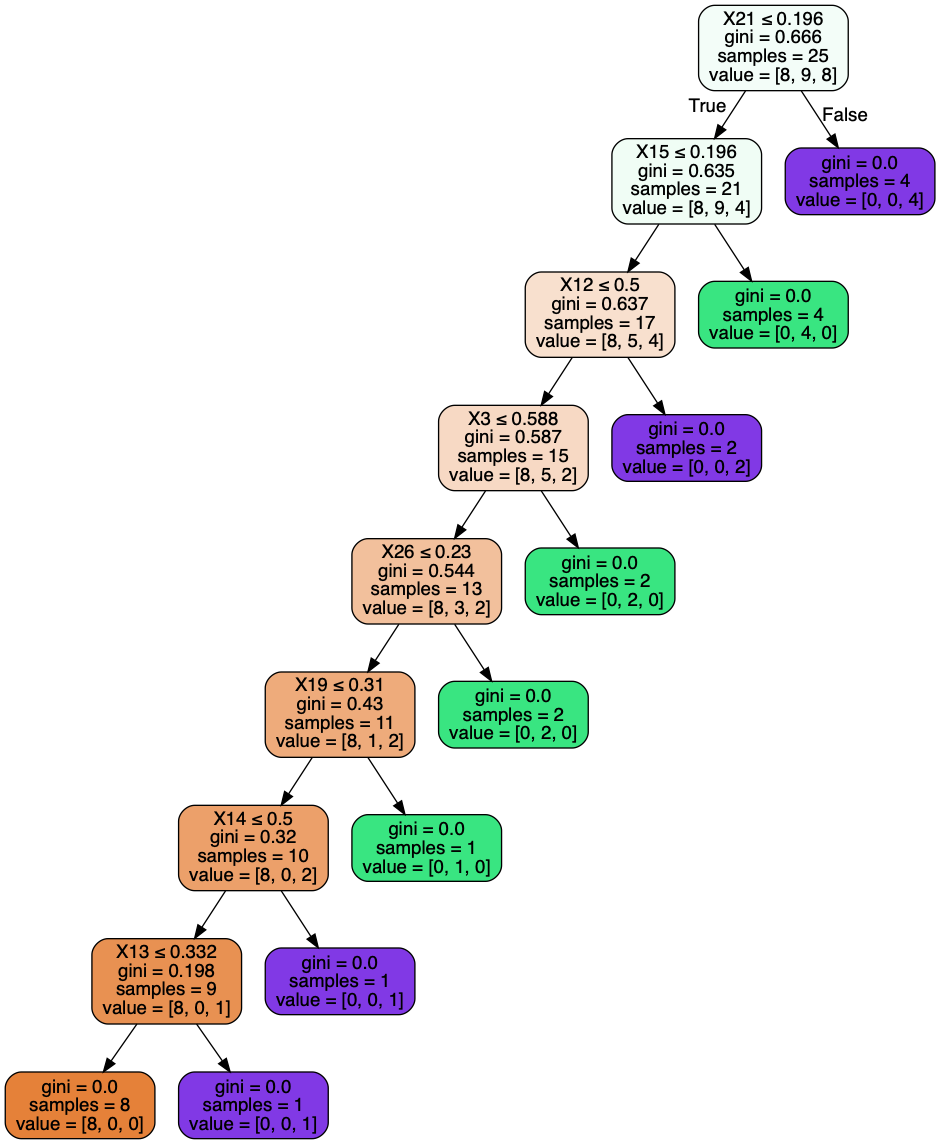

In [79]:
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('question.pdf')

from IPython.display import Image
Image(graph.create_png())

In [80]:
final_predict = list(predict1) + list(predict2) + list(predict3)
final_predict = Counter(final_predict)
print(f'Answer to the question is "{final_predict.most_common(1)[0][0]}"')

Answer to the question is "greeting"


In [81]:
def predict(text):
    P=model.transform([cleaning(text)])
    predict1 = clf1.predict(P)
    predict2 = clf2.predict(P)
    predict3 = clf3.predict(P)
    
    final_predict = list(predict1) + list(predict2) + list(predict3)
    final_predict = Counter(final_predict)
    print(f'Class of question belongs to {final_predict.most_common(1)[0][0]}')
    
    return final_predict.most_common(1)[0][0]

In [82]:
# finding the most similar sentence
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(X_train[1].reshape(1, -1), X_train).flatten() # (25,)
print(f'Cosine Similarity of "{df["question"][1]}" with all questions in corpus:\n {cosine_similarities}')
order = np.array(list(zip(cosine_similarities, range(len(X_train)))), dtype=[('similarity', 'float'), ('index', 'int')])
top3_order = np.sort(order, order='similarity')[::-1][:3]
top3_index = [top3_order[i][1] for i in range(3)]
print(top3_order)
print(f'top 3 most similar questions to "{df["question"][1]}" are:')
print(top3_order)
print(f'Answer to question is {max(df["answer"][top3_index[0]], df["answer"][top3_index[1]], df["answer"][top3_index[2]])}')

Cosine Similarity of "how is your day ?" with all questions in corpus:
 [0.         1.         0.65152087 0.         0.         0.48324727
 0.         0.         0.         0.52406528 0.         0.
 0.         0.         0.         0.52406528 0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
[(1.        ,  1) (0.65152087,  2) (0.52406528, 15)]
top 3 most similar questions to "how is your day ?" are:
[(1.        ,  1) (0.65152087,  2) (0.52406528, 15)]
Answer to question is greeting


In [83]:
# generate answers
import random
answer_dictionary={
    "greeting": ["Have a happy day","Good morning","Have a pleasant day","Good Day"],
    "sandwitch": ["What kind of Sandwitch do you like","Sandwitches are great","Sandwitches are delicious","I love sandwitch too"],
    "goodbye": ["Goodbye","Have a good day","Was nice meeting you","See you later"]
}

def generate_answer(predict_class):
    ans = random.choice(answer_dictionary[predict_class])
    return ans

In [87]:
# chatbot
question = input('Enter Question = ')
prediction = predict(question)
ans = generate_answer(prediction)
print(f'Answer = {ans}')

Enter Question = I want a sandwich
Class of question belongs to sandwitch
Answer = What kind of Sandwitch do you like


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_test=["have a nice day","what's for lunch","how are you"]
Y_test=["greeting","sandwitch","greeting"]

Y_pred = []
for i in X_test:
    print(f'question: {i}')
    prediction = predict(i)
    Y_pred.append(prediction)

print(f'prediction: {Y_pred}')
print(f'actual: {Y_test}')

cnf_matrix = confusion_matrix(Y_test, Y_pred)
print(cnf_matrix)

question: have a nice day
Class of question belongs to goodbye
question: what's for lunch
Class of question belongs to sandwitch
question: how are you
Class of question belongs to greeting
prediction: ['goodbye', 'sandwitch', 'greeting']
actual: ['greeting', 'sandwitch', 'greeting']
[[0 0 0]
 [1 1 0]
 [0 0 1]]


[[0 0 0]
 [1 1 0]
 [0 0 1]]


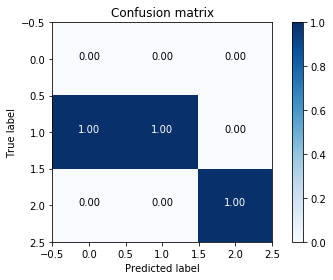

In [41]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, format(cm[i, j], fmt),
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black'
        )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cnf_matrix, classes=['+', '-'], title='Confusion matrix')